# Data Analysis and Preprocessing

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from pandasql import sqldf



In [158]:
train_data = pd.read_csv(r"Information security project\KDD Train Dataset\KDDTrain.txt" , 
                         sep = "," , encoding = 'utf-8')
train_data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [160]:
train_data.shape

(125972, 43)

In [159]:
test_data = pd.read_csv(r"Information security project\KDD Test Dataset\KDDTest.txt" , 
                         sep = "," , encoding = 'utf-8')
test_data.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [161]:
test_data.shape

(22543, 43)

In [163]:
columns_name = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [164]:
train_data.columns = columns_name
test_data.columns = columns_name

In [165]:
train_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [166]:
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [167]:
test_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [168]:
train_data[train_data.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level


In [169]:
test_data[train_data.duplicated()]

<ipython-input-169-54baf4b05fd4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_data[train_data.duplicated()]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level


In [10]:
train_data =train_data.drop(['service'] ,axis = 1)
test_data =test_data.drop(['service'] ,axis = 1)

In [11]:
query1 = "SELECT * FROM train_data  t WHERE attack  in ('neptune', 'normal', 'guess_passwd', 'smurf', 'satan', 'buffer_overflow', 'back', 'warezmaster', 'pod', 'nmap', 'ipsweep','portsweep', 'multihop', 'loadmodule', 'teardrop', 'rootkit','perl', 'land', 'ftp_write', 'imap', 'phf')"
train_data = sqldf(query1)

In [12]:
query2 = "SELECT * FROM test_data t WHERE attack  in ('neptune', 'normal', 'guess_passwd', 'smurf', 'satan','buffer_overflow', 'back', 'warezmaster', 'pod', 'nmap', 'ipsweep', 'portsweep', 'multihop', 'loadmodule', 'teardrop', 'rootkit','perl', 'land', 'ftp_write', 'imap', 'phf')"
test_data = sqldf(query2)

In [9]:
len(train_data.attack.unique())

21

In [10]:
len(test_data.attack.unique())

21

In [13]:
train_data = pd.get_dummies(train_data,columns=['protocol_type','flag'],prefix="",prefix_sep="")
test_data = pd.get_dummies(test_data,columns=['protocol_type','flag'],prefix="",prefix_sep="")

In [14]:
train_data['attack'].value_counts()


normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
Name: attack, dtype: int64

In [15]:
test_data['attack'].value_counts()

normal             9711
neptune            4656
guess_passwd       1231
warezmaster         944
satan               735
smurf               665
back                359
portsweep           157
ipsweep             141
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
rootkit              13
teardrop             12
land                  7
ftp_write             3
loadmodule            2
phf                   2
perl                  2
imap                  1
Name: attack, dtype: int64

In [16]:
from sklearn.preprocessing import label_binarize


In [17]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# train_data['attack_encode'] = label_encoder.fit_transform( train_data['attack'])
# test_data['attack_encode'] = label_encoder.fit_transform( test_data['attack'])


In [18]:
xtrain = train_data.drop(['attack','level'] ,axis = 1)
ytrain = train_data['attack']

xtest = test_data.drop(['attack','level'] ,axis = 1)
ytest = test_data['attack']

# Data Scaling Using Min Max Scaling

In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [21]:
X_train_minmax = minmax_scaler.fit_transform(xtrain)
X_test_minmax = minmax_scaler.fit_transform(xtest)


# Decision Tree

In [20]:
from sklearn.tree  import DecisionTreeClassifier
DT =DecisionTreeClassifier()

In [25]:
param_grid = {
    'max_features': [1,3,5,8],
    'max_depth': [2, 5, 10, 15,30],
    'min_samples_split': [2, 5, 10,13],
    'min_samples_leaf': [1, 2, 4,6]
}
grid_search = RandomizedSearchCV(estimator=DT, param_distributions=param_grid, cv=3)
grid_search.fit(X_train_minmax, ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 8, 'max_depth': 30}


In [26]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=30, max_features=8, min_samples_leaf=2,
                       min_samples_split=5)

In [27]:
best_model.score(X_train_minmax, ytrain)

0.9972657499200511

In [28]:
best_model.score(X_test_minmax, ytest)

0.8419624328207311

In [29]:
pred_y = best_model.predict(X_test_minmax)

In [30]:
from sklearn.metrics import classification_report
report = classification_report(ytest, pred_y)
print(report)

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       0.98      0.60      0.75       359
buffer_overflow       0.00      0.00      0.00        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       1.00      0.01      0.01      1231
           imap       0.00      0.00      0.00         1
        ipsweep       0.70      0.31      0.43       141
           land       1.00      0.57      0.73         7
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00        18
        neptune       1.00      0.97      0.98      4656
           nmap       0.94      1.00      0.97        73
         normal       0.80      0.97      0.87      9711
           perl       0.00      0.00      0.00         2
            phf       1.00      0.50      0.67         2
            pod       0.24      0.88      0.38        41
      portsweep       0.70      0.93      0.80       157
        rootkit       0.00    

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier( n_estimators=10, min_samples_split=3,
    min_samples_leaf=3)
from scipy.stats import randint


In [47]:

rf_model.score(X_train_minmax, ytrain)

0.9977854173329069

In [48]:
rf_model.score(X_test_minmax, ytest)

0.8523918480285213

In [49]:
pred_y = rf_model.predict(X_test_minmax)

In [50]:
from sklearn.metrics import classification_report
report = classification_report(ytest, pred_y)
print(report)

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       0.98      0.88      0.93       359
buffer_overflow       0.00      0.00      0.00        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.00      0.00      0.00      1231
           imap       0.00      0.00      0.00         1
        ipsweep       0.98      0.31      0.47       141
           land       1.00      0.29      0.44         7
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00        18
        neptune       1.00      0.98      0.99      4656
           nmap       1.00      1.00      1.00        73
         normal       0.80      0.97      0.88      9711
           perl       0.00      0.00      0.00         2
            phf       1.00      0.50      0.67         2
            pod       0.25      0.93      0.39        41
      portsweep       0.62      0.95      0.75       157
        rootkit       0.00    

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector

In [51]:
from sklearn import svm
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train_minmax, ytrain)
svc.score(X_train_minmax, ytrain)

0.9861448672849377

In [52]:
svc.score(X_test_minmax, ytest)

0.8472835630287873

In [53]:
pred_y = svc.predict(X_test_minmax)

In [54]:
from sklearn.metrics import classification_report
report = classification_report(ytest, pred_y)
print(report)

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       0.97      0.21      0.34       359
buffer_overflow       0.00      0.00      0.00        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.00      0.00      0.00      1231
           imap       0.00      0.00      0.00         1
        ipsweep       0.87      0.98      0.92       141
           land       1.00      1.00      1.00         7
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00        18
        neptune       1.00      1.00      1.00      4656
           nmap       0.92      1.00      0.96        73
         normal       0.79      0.97      0.87      9711
           perl       0.00      0.00      0.00         2
            phf       0.00      0.00      0.00         2
            pod       0.71      0.88      0.78        41
      portsweep       0.67      0.91      0.77       157
        rootkit       0.00    

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Mulit Logistic

In [113]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=12, random_state=5)


In [114]:
logistic_regression_model.fit(X_train_minmax, ytrain)

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=12, multi_class='multinomial', random_state=5)

In [115]:
logistic_regression_model.score(X_train_minmax, ytrain)

0.9584905660377359

In [116]:
logistic_regression_model.score(X_test_minmax, ytest)

0.8332889905815996

In [117]:
pred_y = logistic_regression_model.predict(X_test_minmax)

In [118]:
from sklearn.metrics import classification_report
report = classification_report(ytest, pred_y)
print(report)

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       0.00      0.00      0.00       359
buffer_overflow       0.00      0.00      0.00        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.00      0.00      0.00      1231
           imap       0.00      0.00      0.00         1
        ipsweep       0.74      0.98      0.84       141
           land       0.00      0.00      0.00         7
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00        18
        neptune       1.00      1.00      1.00      4656
           nmap       0.88      1.00      0.94        73
         normal       0.78      0.96      0.86      9711
           perl       0.00      0.00      0.00         2
            phf       0.00      0.00      0.00         2
            pod       0.00      0.00      0.00        41
      portsweep       0.69      0.92      0.79       157
        rootkit       0.00    

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K Nearest Neighbour

In [131]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=2) 
KNN.fit(X_train_minmax, ytrain)
KNN.score(X_train_minmax, ytrain)

0.9980572433642468

In [132]:
KNN.score(X_test_minmax, ytest)

0.8400468259458309

In [133]:
pred_y = KNN.predict(X_test_minmax)

In [134]:
from sklearn.metrics import classification_report
report = classification_report(ytest, pred_y)
print(report)

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       0.94      0.40      0.56       359
buffer_overflow       0.00      0.00      0.00        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.00      0.00      0.00      1231
           imap       0.00      0.00      0.00         1
        ipsweep       0.93      0.98      0.96       141
           land       1.00      0.86      0.92         7
     loadmodule       0.00      0.00      0.00         2
       multihop       0.02      0.06      0.03        18
        neptune       1.00      0.98      0.99      4656
           nmap       0.90      1.00      0.95        73
         normal       0.78      0.98      0.87      9711
           perl       0.00      0.00      0.00         2
            phf       0.33      0.50      0.40         2
            pod       0.71      0.85      0.78        41
      portsweep       0.57      0.94      0.71       157
        rootkit       0.00    

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Deep Learning ANN Classifier

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [23]:
model = Sequential()
model.add(Dense(units=64, input_dim=X_train_minmax.shape[1], activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(21, activation='softmax'))  # Number of units matches the number of classes


In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(ytrain)


In [176]:
model.fit(X_train_minmax, y_encoded, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
3518/3518 [==============================] - 6s 2ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.0955 - val_accuracy: 0.9971
Epoch 2/100
3518/3518 [==============================] - 6s 2ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0880 - val_accuracy: 0.9971
Epoch 3/100
3518/3518 [==============================] - 6s 2ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.1069 - val_accuracy: 0.9974
Epoch 4/100
3518/3518 [==============================] - 7s 2ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.1042 - val_accuracy: 0.9967
Epoch 5/100
3518/3518 [==============================] - 7s 2ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.1020 - val_accuracy: 0.9970
Epoch 6/100
3518/3518 [==============================] - 5s 1ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0973 - val_accuracy: 0.9974
Epoch 7/100
3518/3518 [==============================] - 5s 1ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.1002 - val_ac

In [35]:
y_encoded_test = label_encoder.fit_transform(ytest)
len(y_encoded_test)

18793

In [36]:
loss, accuracy = model.evaluate(X_test_minmax, y_encoded_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


588/588 [==============================] - 2s 3ms/step - loss: 20.2495 - accuracy: 0.8545
Test Loss: 20.249540328979492, Test Accuracy: 0.8544670939445496


In [54]:
predictions = model.predict(X_test_minmax)

588/588 [==============================] - 1s 2ms/step


In [55]:
y_pred = np.argmax(predictions, axis=1)
len(y_pred)

18793

In [56]:
b = {11: 'normal', 9: 'neptune', 3: 'guess_passwd', 20: 'warezmaster', 17: 'satan', 18: 'smurf', 0: 'back',
     15: 'portsweep', 5: 'ipsweep', 10: 'nmap', 14: 'pod', 1: 'buffer_overflow', 8: 'multihop', 16: 'rootkit',
     19: 'teardrop', 6: 'land', 2: 'ftp_write', 7: 'perl', 12: 'loadmodule', 13: 'phf', 4: 'imap'}
sorted_b = dict(sorted(b.items()))

In [57]:
from sklearn.metrics import classification_report
report = classification_report(y_encoded_test, y_pred,target_names=sorted_b.values())
print(report)

                 precision    recall  f1-score   support

           back       0.94      0.90      0.92       359
buffer_overflow       0.17      0.05      0.08        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.00      0.00      0.00      1231
           imap       0.00      0.00      0.00         1
        ipsweep       0.91      0.99      0.95       141
           land       1.00      0.14      0.25         7
           perl       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00        18
        neptune       1.00      0.99      1.00      4656
           nmap       0.97      1.00      0.99        73
         normal       0.81      0.97      0.88      9711
     loadmodule       0.00      0.00      0.00         2
            phf       0.50      0.50      0.50         2
            pod       0.68      0.83      0.75        41
      portsweep       0.72      0.92      0.81       157
        rootkit       0.00    

# accuracy table on testing dataset

In [254]:
import pandas as pd

model_names = ['Decision Tree', 'Random Forest', 'Support Vector Classifier', 'Logistic Regression','K Nearest Neighbour','ANN Classifier']
accuracy_values = [84.19624,85.2391,84.7283,83.328,84.004,85.41477]

accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_values
})

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print('accuracy table on test dataset')
print(accuracy_df)


accuracy table on test dataset
                       Model  Accuracy
5             ANN Classifier  85.41477
1              Random Forest  85.23910
2  Support Vector Classifier  84.72830
0              Decision Tree  84.19624
4        K Nearest Neighbour  84.00400
3        Logistic Regression  83.32800


# accuracy table on training dataset

In [1]:
import pandas as pd

model_names = ['Decision Tree', 'Random Forest', 'Support Vector Classifier', 'Logistic Regression','K Nearest Neighbour','ANN Classifier']
accuracy_values = [99.7265,99.77854,98.614,95.8490,99.805,99.50]

accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_values
})

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print('accuracy table on train dataset')
print(accuracy_df)


accuracy table on train dataset
                       Model  Accuracy
4        K Nearest Neighbour  99.80500
1              Random Forest  99.77854
0              Decision Tree  99.72650
5             ANN Classifier  99.50000
2  Support Vector Classifier  98.61400
3        Logistic Regression  95.84900


# Precision Plot

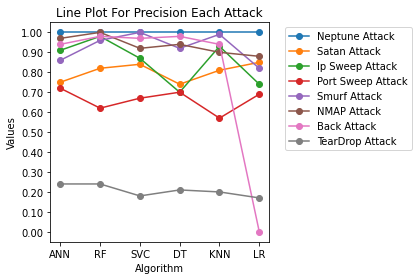

In [171]:
import matplotlib.pyplot as plt

# Sample data
categories = ['ANN', 'RF', 'SVC', 'DT', 'KNN', 'LR']
pre_na = [1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
pre_satan = [0.75,0.82, 0.84 ,0.74,0.81, 0.85]
pre_swep_at = [ 0.91,0.98, 0.87, 0.70,0.93,0.74 ]
pre_port_swe = [0.72,0.62,0.67,0.70,0.57,0.69]
pre_smur_att = [0.86,0.96,1.00 , 0.92,0.99,0.82 ]
pre_nmap = [0.97,1.00,0.92,0.94,0.90 , 0.88  ]
pre_bac_att = [0.94,0.98 ,0.97 , 0.98 ,0.94,0.00]
pre_tear_dr_att = [ 0.24,0.24,0.18,0.21,0.20, 0.17 ]


# Plotting the line plot
plt.plot(categories, pre_na, label='Neptune Attack', marker='o')
plt.plot(categories, pre_satan, label='Satan Attack', marker='o')
plt.plot(categories, pre_swep_at, label='Ip Sweep Attack', marker='o')
plt.plot(categories, pre_port_swe, label='Port Sweep Attack', marker='o')
plt.plot(categories, pre_smur_att, label='Smurf Attack', marker='o')
plt.plot(categories, pre_nmap, label='NMAP Attack', marker='o')
plt.plot(categories, pre_bac_att, label='Back Attack', marker='o')
plt.plot(categories, pre_tear_dr_att, label='TearDrop Attack', marker='o')
# Adding labels and title
plt.xlabel('Algorithm')
plt.ylabel('Values')
plt.title('Line Plot For Precision Each Attack')

# Set y-axis limits from 0 to 1
# plt.ylim(0, 1)
plt.yticks([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])


# Display legend
# plt.legend(loc='lower center')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Ensure integer ticks on the y-axis
# plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
# plt.savefig('line_plot_123.png', dpi=300)
# Show the plot
plt.show()







# Recall Plot

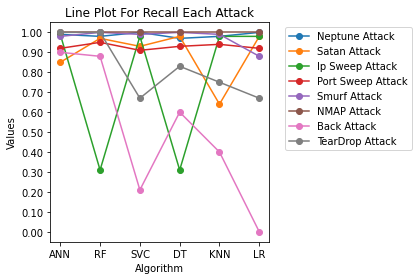

In [173]:
import matplotlib.pyplot as plt

# Sample data
categories = ['ANN', 'RF', 'SVC', 'DT', 'KNN', 'LR']
pre_na =  [0.99, 0.98, 1.00, 0.97,0.98,1.00]
pre_satan = [ 0.85,0.97,0.93,0.98,0.64, 0.98]
pre_swep_at =[0.99,0.31 ,0.98,0.31,0.98 , 0.98  ]
pre_port_swe = [0.92 ,0.95, 0.91,0.93,0.94,0.92   ]
pre_smur_att =  [0.98, 1.00,0.99,1.00,0.99, 0.88  ]
pre_nmap =   [1.00,1.00,1.00,1.00 ,1.00 , 1.00]
pre_bac_att =[0.90,0.88,0.21 ,0.60 , 0.40,0.00 ]
pre_tear_dr_att = [1.00 ,1.00 ,0.67, 0.83 , 0.75, 0.67 ]


# Plotting the line plot
plt.plot(categories, pre_na, label='Neptune Attack', marker='o')
plt.plot(categories, pre_satan, label='Satan Attack', marker='o')
plt.plot(categories, pre_swep_at, label='Ip Sweep Attack', marker='o')
plt.plot(categories, pre_port_swe, label='Port Sweep Attack', marker='o')
plt.plot(categories, pre_smur_att, label='Smurf Attack', marker='o')
plt.plot(categories, pre_nmap, label='NMAP Attack', marker='o')
plt.plot(categories, pre_bac_att, label='Back Attack', marker='o')
plt.plot(categories, pre_tear_dr_att, label='TearDrop Attack', marker='o')
# Adding labels and title
plt.xlabel('Algorithm')
plt.ylabel('Values')
plt.title('Line Plot For Recall Each Attack')

# Set y-axis limits from 0 to 1
# plt.ylim(0, 1)
plt.yticks([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])


# Display legend
# plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.tight_layout()
# plt.savefig('line_plot_12345.png', dpi=300)
# Ensure integer ticks on the y-axis
# plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Show the plot
plt.show()


# F1-Score Plot

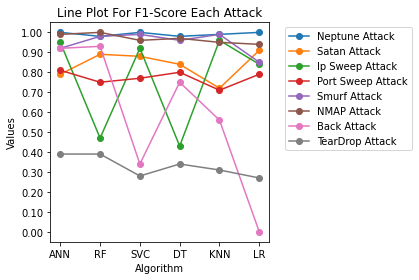

In [175]:
import matplotlib.pyplot as plt

# Sample data
categories = ['ANN', 'RF', 'SVC', 'DT', 'KNN', 'LR']
pre_na = [1.00, 0.98, 1.00, 0.98,0.99,1.00]
pre_satan = [0.79, 0.89,0.88 ,0.84,0.72,0.91 ]
pre_swep_at =[0.95 ,0.47, 0.92, 0.43, 0.96,0.84  ]
pre_port_swe =[0.81 , 0.75 , 0.77 ,0.80 ,0.71, 0.79 ]
pre_smur_att =  [ 0.92 ,0.98,0.99 , 0.96,0.99,0.85  ]
pre_nmap =   [ 0.99,1.00,0.96,0.97 , 0.95  ,0.94 ]
pre_bac_att =[0.92,0.93 ,0.34 ,0.75,0.56 , 0.00 ]
pre_tear_dr_att =[0.39, 0.39 ,0.28,  0.34 ,0.31 ,0.27]


# Plotting the line plot
plt.plot(categories, pre_na, label='Neptune Attack', marker='o')
plt.plot(categories, pre_satan, label='Satan Attack', marker='o')
plt.plot(categories, pre_swep_at, label='Ip Sweep Attack', marker='o')
plt.plot(categories, pre_port_swe, label='Port Sweep Attack', marker='o')
plt.plot(categories, pre_smur_att, label='Smurf Attack', marker='o')
plt.plot(categories, pre_nmap, label='NMAP Attack', marker='o')
plt.plot(categories, pre_bac_att, label='Back Attack', marker='o')
plt.plot(categories, pre_tear_dr_att, label='TearDrop Attack', marker='o')
# Adding labels and title
plt.xlabel('Algorithm')
plt.ylabel('Values')
plt.title('Line Plot For F1-Score Each Attack')

# Set y-axis limits from 0 to 1
# plt.ylim(0, 1)
plt.yticks([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])


# Display legend
# plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.tight_layout()
# plt.savefig('line_plot_fi.png', dpi=300)
# Ensure integer ticks on the y-axis
# plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Show the plot
plt.show()
